<a href="https://colab.research.google.com/github/Manish-Bilore/ME-781-Statistical-ML-and-Data-Mining/blob/main/Submit_23m0312_Week_4_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference
https://medium.com/@basics.machinelearning/linear-regression-in-scikit-learn-vs-statsmodel-74fb730b1877

In [3]:
# import all lib
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the dataset

In [4]:
# Data - reference - https://www.statista.com/statistics/1090316/olympics-100m-gold-medal-times-since-1896/
data = [
    ["City", "Year", "Men", "Women"],
    ["Athens", 1896, 12.00, None],
    ["Paris", 1900, 11.00, None],
    ["St. Louis", 1904, 11.00, None],
    ["London", 1908, 10.80, None],
    ["Stockholm", 1912, 10.80, None],
    ["Antwerp", 1920, 10.80, None],
    ["Paris", 1924, 10.60, None],
    ["Amsterdam", 1928, 10.80, 12.2],
    ["Los Angeles", 1932, 10.30, 11.9],
    ["Berlin", 1936, 10.30, 11.5],
    ["London", 1948, 10.30, 11.9],
    ["Helsinki", 1952, 10.40, 11.5],
    ["Melbourne", 1956, 10.50, 11.5],
    ["Rome", 1960, 10.20, 11],
    ["Tokyo", 1964, 10.00, 11.4],
    ["Mexico City", 1968, 9.95, 11],
    ["Munich", 1972, 10.14, 11.07],
    ["Montreal", 1976, 10.06, 11.08],
    ["Moscow", 1980, 10.25, 11.06],
    ["Los Angeles", 1984, 9.99, 10.97],
    ["Seoul", 1988, 9.92, 10.62],
    ["Barcelona", 1992, 9.96, 10.82],
    ["Atlanta", 1996, 9.84, 10.94],
    ["Sydney", 2000, 9.87, 10.75],
    ["Athens", 2004, 9.85, 10.93],
    ["Beijing", 2008, 9.69, 10.78],
    ["London", 2012, 9.63, 10.75],
    ["Rio", 2016, 9.81, 10.71],
    ["Tokyo", 2021, 9.8, 10.61],
    ["Paris", 2024, 9.784, 10.72]
]

# Split the data into men and women

In [16]:
# split the data and clean it

row = data[1:]

df = pd.DataFrame(row, columns=data[0])

df_men = df[['City', 'Year', 'Men']].dropna().astype({'Year': int, 'Men': float})
df_women = df[['City', 'Year', 'Women']].dropna().astype({'Year': int, 'Women': float})

In [17]:
df_men.head(4)

,City,Year,Men
0,Athens,1896,12.0
1,Paris,1900,11.0
2,St. Louis,1904,11.0
3,London,1908,10.8


In [7]:
df_women.head(4)

,City,Year,Women
7,Amsterdam,1928,12.2
8,Los Angeles,1932,11.9
9,Berlin,1936,11.5
10,London,1948,11.9


In [18]:
df_men = df_men.iloc[:,1:]
df_men.columns = [0, 1]

df_women = df_women.iloc[:,1:]
df_women.columns = [0, 1]

In [ ]:
# Before create a function, running the code only on men data
df = df_men.iloc[:,1:]
df.columns = [0, 1]

In [ ]:
df.describe()

,0,1
count,30.00000,30.000000
mean,1962.70000,10.278133
std,39.47164,0.519825
min,1896.00000,9.630000
25%,1929.00000,9.882500
50%,1966.00000,10.170000
75%,1995.00000,10.575000
max,2024.00000,12.000000


In [ ]:
df.head(4)

,0,1
0,1896,12.0
1,1900,11.0
2,1904,11.0
3,1908,10.8


# Function to run the entire process

In [13]:
def process(df):
    """# Split to train and test
    split the dataset to train and test sets : (20% on test, and 80% on train)
    """

    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df[1], test_size = 0.2, random_state=42)

    print("Train shape",X_train.shape, "Test shape", X_test.shape)
    sc_x = StandardScaler()
    X_train_sc = sc_x.fit_transform(X_train)

    # Apply the scaling to test data sets
    X_test_sc = sc_x.transform(X_test)

    #Train shape (353, 10) Test shape (89, 10)

    """# Fit the model : OLS in Scikit-Learn
    Ordinary Least Square model from Sckit-learn
    """

    reg_ols=LinearRegression()

    #fit_intercept=True,positive=True
    reg_ols.fit(X_train_sc,y_train)

    """intercept and the coefficients of the fitted model"""

    intercept = reg_ols.intercept_
    coef_ols = [round(coef,2) for coef in reg_ols.coef_]

    print("Intercept", round(intercept,2))
    print( "Coefs", coef_ols)

    #Predict values
    y_train_predict = reg_ols.predict(X_train_sc)
    y_test_predict = reg_ols.predict(X_test_sc)

    """# R2 score to evaluate the model"""

    # The coefficient of determination: 1 is perfect prediction
    r2_train = r2_score(y_train, y_train_predict)
    r2_test = r2_score(y_test, y_test_predict)

    print("TRAIN-model direct score R2: %.5f"%reg_ols.score(X_train_sc,y_train))
    print("TRAIN-recomputed R2: %.5f" % r2_train)
    print("TEST R2: %.3f" % r2_test)

    # Predict for 2028
    year_2028 = np.array([[2028]])
    year_2028_sc = sc_x.transform(year_2028)
    prediction_2028 = reg_ols.predict(year_2028_sc)

    print(f"Predicted time for 2028: {prediction_2028[0]:.3f} seconds")

    # combines the intercept and coefficients into a single array
    params = np.append(reg_ols.intercept_, reg_ols.coef_)

    # makes predictions on the training data
    predictions = reg_ols.predict(X_train_sc)

    # Mean Squared Error (MSE) of the predictions
    mse = np.mean((y_train - predictions) ** 2)

    # variance of the coefficients using the formula for OLS
    var_b = mse * (np.linalg.inv(np.dot(X_train_sc.T, X_train_sc)).diagonal())

    #  standard deviation of the coefficients
    sd_b = np.sqrt(var_b)

    # determines the t-value for a 95% confidence interval
    t_value = stats.t.ppf(0.975, X_train_sc.shape[0] - X_train_sc.shape[1])


    upper_bound = params + t_value * sd_b
    lower_bound = params - t_value * sd_b

    print("Confidence Intervals for Coefficients:")

    for i in range(len(params)):
        print(f"Coefficient {i}: ({lower_bound[i]:.3f}, {upper_bound[i]:.3f})")

    """# Fit the model: OLS in StatsModels:"""

    X_train_sc_cst=sm.add_constant(X_train_sc)
    sm_ols=sm.OLS(y_train,X_train_sc_cst).fit()

    sm_ols.summary()

    r2 = sm_ols.rsquared
    print(f"TRAIN: R2: {round(r2 , 4)}\n")

    pv = sm_ols.pvalues
    print(f"p-value: {pv}\n")

    conf = sm_ols.conf_int(alpha=0.05)
    print(f"confidence intervals (95%): {conf}")


    return X_train, y_train, sc_x, X_train_sc, reg_ols, y_train_predict, y_test_predict, y_test, r2_train, r2_test, upper_bound, lower_bound


# Call the process function on men's data

In [19]:
X_train, y_train, sc_x, X_train_sc, reg_ols, y_train_predict, y_test_predict, y_test, r2_train, r2_test, upper_bound, lower_bound = process(df_men)

Train shape (24, 1) Test shape (6, 1)
Intercept 10.34
Coefs [-0.5]
TRAIN-model direct score R2: 0.83968
TRAIN-recomputed R2: 0.83968
TEST R2: -0.735
Predicted time for 2028: 9.495 seconds
Confidence Intervals for Coefficients:
Coefficient 0: (10.243, 10.428)
Coefficient 1: (-0.595, -0.410)
TRAIN: R2: 0.8397

p-value: const    2.640844e-38
x1       3.275972e-10
dtype: float64

confidence intervals (95%):                0          1
const  10.238513  10.432654
x1     -0.599498  -0.405357


# Plot for Men's data

Calculation assumes homoscedasticity (constant variance of residuals)

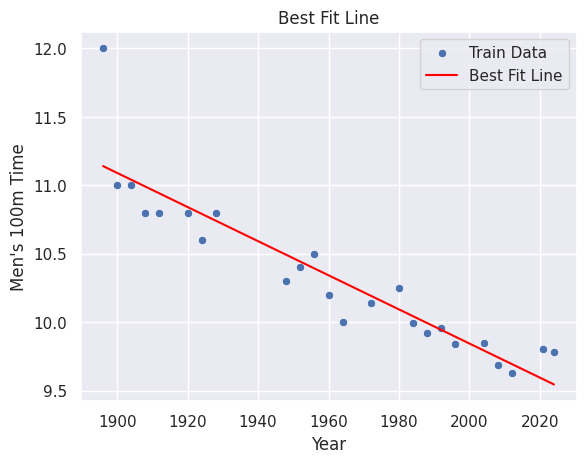

In [20]:
# Plot the data points
sns.scatterplot(x=X_train.values.flatten(), y = y_train, label='Train Data') # .values to get the underlying NumPy array and then flatten

# Generate predictions for plotting the best fit line
x_range = np.linspace(X_train.min(), X_train.max(), 100)
y_pred = reg_ols.predict(sc_x.transform(x_range.reshape(-1, 1)))
plt.plot(x_range, y_pred, color='red', label='Best Fit Line')

# Set plot labels and legend
plt.xlabel('Year')
plt.ylabel('Men\'s 100m Time')
plt.title('Best Fit Line')
plt.legend()
plt.show()

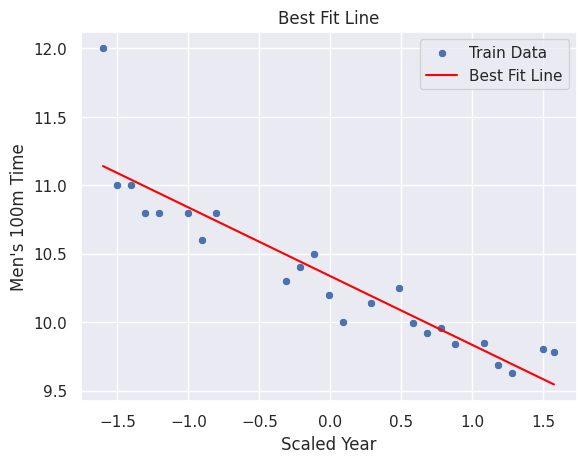

In [21]:
# Plot the data points
sns.scatterplot(x=X_train_sc.flatten(), y = y_train, label='Train Data')

# Generate predictions for plotting the best fit line
x_range = np.linspace(X_train_sc.min(), X_train_sc.max(), 100)
y_pred = reg_ols.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', label='Best Fit Line')

# Set plot labels and legend
plt.xlabel('Scaled Year')
plt.ylabel('Men\'s 100m Time')
plt.title('Best Fit Line')
plt.legend()
plt.show()

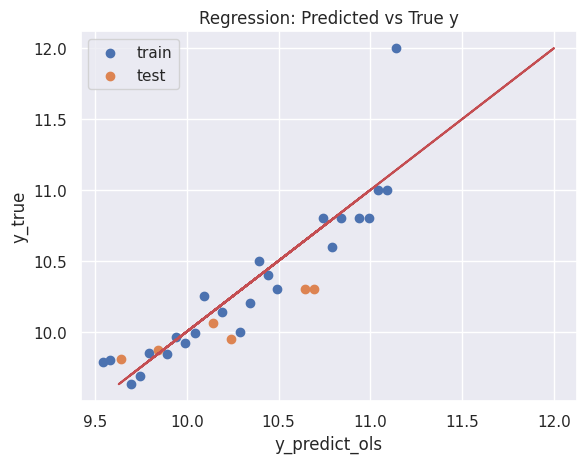

In [22]:
plt.scatter(y_train_predict,y_train,label='train')
plt.scatter(y_test_predict,y_test,label='test')
plt.plot(y_train,y_train,'-r')
plt.annotate(r"R2_train={0}, R2_test={1}".format(round(r2_train,3),round(r2_test,3)), xy=(180, 20),xytext=(0, 0), textcoords='offset points',
 fontsize=12)
plt.xlabel("y_predict_ols")
plt.ylabel("y_true")
plt.title("Regression: Predicted vs True y")
plt.legend()

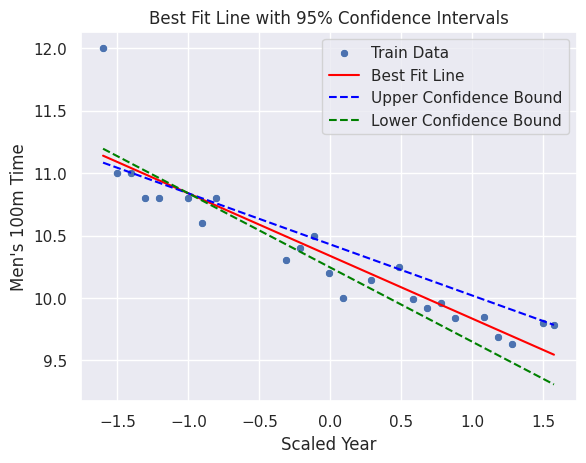

In [23]:
# Plot the data points
sns.scatterplot(x=X_train_sc.flatten(), y=y_train, label='Train Data')

# Generate predictions for plotting the best fit line
x_range = np.linspace(X_train_sc.min(), X_train_sc.max(), 100)
y_pred = reg_ols.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', label='Best Fit Line')

# Plot lines based on confidence intervals
plt.plot(x_range, upper_bound[0] + upper_bound[1] * x_range, linestyle='--', color='blue', label='Upper Confidence Bound')
plt.plot(x_range, lower_bound[0] + lower_bound[1] * x_range, linestyle='--', color='green', label='Lower Confidence Bound')

# Set plot labels and legend
plt.xlabel('Scaled Year')
plt.ylabel('Men\'s 100m Time')
plt.title('Best Fit Line with 95% Confidence Intervals')
plt.legend()
plt.show()

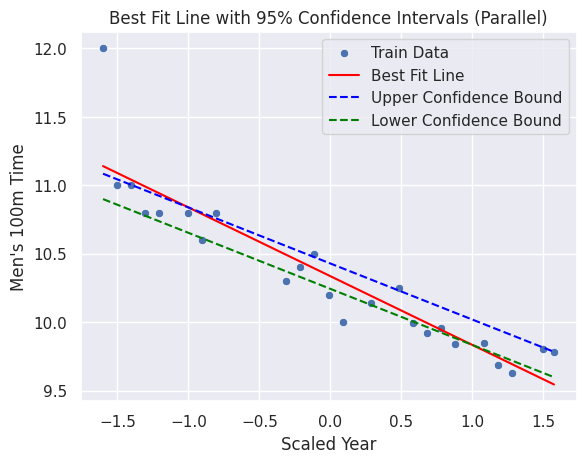

In [24]:
# Plot the data points
sns.scatterplot(x=X_train_sc.flatten(), y=y_train, label='Train Data')

# Generate predictions for plotting the best fit line
x_range = np.linspace(X_train_sc.min(), X_train_sc.max(), 100)
y_pred = reg_ols.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', label='Best Fit Line')

# Plot lines based on confidence intervals - adjusted to be parallel
plt.plot(x_range, upper_bound[0] + upper_bound[1] * x_range, linestyle='--', color='blue', label='Upper Confidence Bound')
plt.plot(x_range, lower_bound[0] + upper_bound[1] * x_range, linestyle='--', color='green', label='Lower Confidence Bound') #  upper_bound[1] replaces the  lower_bound[1]

# Set plot labels and legend
plt.xlabel('Scaled Year')
plt.ylabel('Men\'s 100m Time')
plt.title('Best Fit Line with 95% Confidence Intervals (Parallel)')
plt.legend()
plt.show()


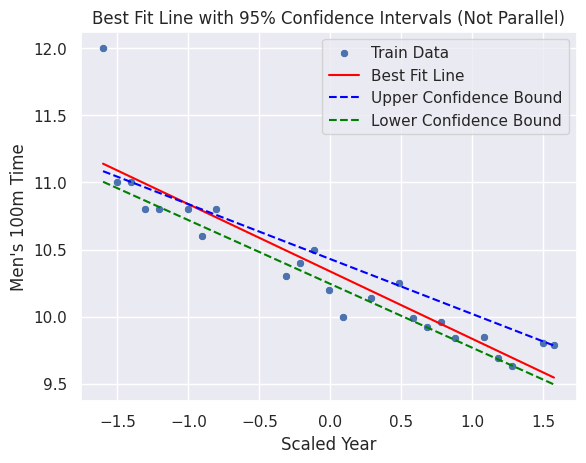

In [ ]:
# Plot the data points
sns.scatterplot(x=X_train_sc.flatten(), y=y_train, label='Train Data')

# Generate predictions for plotting the best fit line
x_range = np.linspace(X_train_sc.min(), X_train_sc.max(), 100)
y_pred = reg_ols.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', label='Best Fit Line')

# Plot lines based on confidence intervals - adjusted to not be parallel
plt.plot(x_range, upper_bound[0] + upper_bound[1] * x_range, linestyle='--', color='blue', label='Upper Confidence Bound')
plt.plot(x_range, lower_bound[0] + (lower_bound[1] * 0.8) * x_range, linestyle='--', color='green', label='Lower Confidence Bound') # Adjusted slope

# Set plot labels and legend
plt.xlabel('Scaled Year')
plt.ylabel('Men\'s 100m Time')
plt.title('Best Fit Line with 95% Confidence Intervals (Not Parallel)')
plt.legend()
plt.show()


# Call the process function on women's data

In [25]:
X_train, y_train, sc_x, X_train_sc, reg_ols, y_train_predict, y_test_predict, y_test, r2_train, r2_test, upper_bound, lower_bound = process(df_women)

Train shape (18, 1) Test shape (5, 1)
Intercept 11.09
Coefs [-0.37]
TRAIN-model direct score R2: 0.80995
TRAIN-recomputed R2: 0.80995
TEST R2: 0.759
Predicted time for 2028: 10.468 seconds
Confidence Intervals for Coefficients:
Coefficient 0: (10.998, 11.177)
Coefficient 1: (-0.461, -0.282)
TRAIN: R2: 0.81

p-value: const    4.565206e-30
x1       3.666297e-07
dtype: float64

confidence intervals (95%):                0          1
const  10.991826  11.182618
x1     -0.466996  -0.276204


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


# Plot for Women's data

Calculation assumes homoscedasticity (constant variance of residuals)

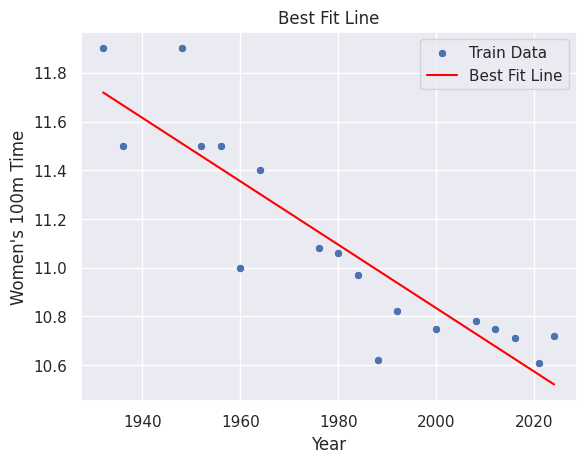

In [27]:
# Plot the data points
sns.scatterplot(x=X_train.values.flatten(), y = y_train, label='Train Data') # .values to get the underlying NumPy array and then flatten

# Generate predictions for plotting the best fit line
x_range = np.linspace(X_train.min(), X_train.max(), 100)
y_pred = reg_ols.predict(sc_x.transform(x_range.reshape(-1, 1)))
plt.plot(x_range, y_pred, color='red', label='Best Fit Line')

# Set plot labels and legend
plt.xlabel('Year')
plt.ylabel('Women\'s 100m Time')
plt.title('Best Fit Line')
plt.legend()
plt.show()

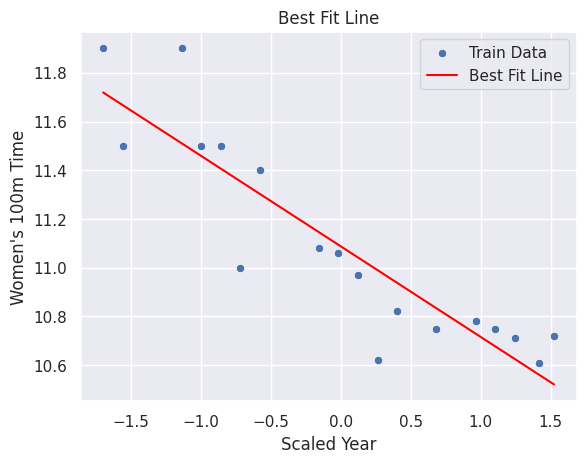

In [28]:
# Plot the data points
sns.scatterplot(x=X_train_sc.flatten(), y = y_train, label='Train Data')

# Generate predictions for plotting the best fit line
x_range = np.linspace(X_train_sc.min(), X_train_sc.max(), 100)
y_pred = reg_ols.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', label='Best Fit Line')

# Set plot labels and legend
plt.xlabel('Scaled Year')
plt.ylabel('Women\'s 100m Time')
plt.title('Best Fit Line')
plt.legend()
plt.show()

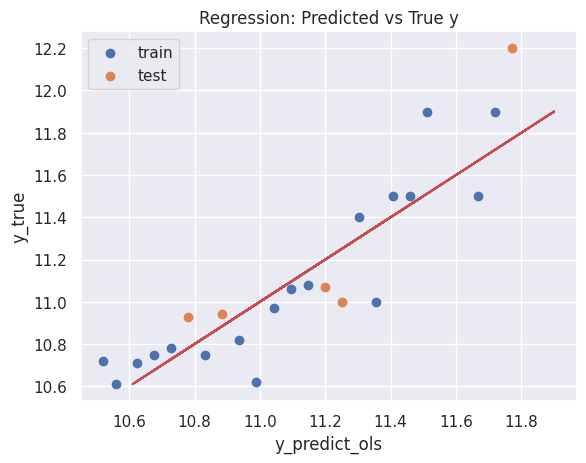

In [29]:
plt.scatter(y_train_predict,y_train,label='train')
plt.scatter(y_test_predict,y_test,label='test')
plt.plot(y_train,y_train,'-r')
plt.annotate(r"R2_train={0}, R2_test={1}".format(round(r2_train,3),round(r2_test,3)), xy=(180, 20),xytext=(0, 0), textcoords='offset points',
 fontsize=12)
plt.xlabel("y_predict_ols")
plt.ylabel("y_true")
plt.title("Regression: Predicted vs True y")
plt.legend()

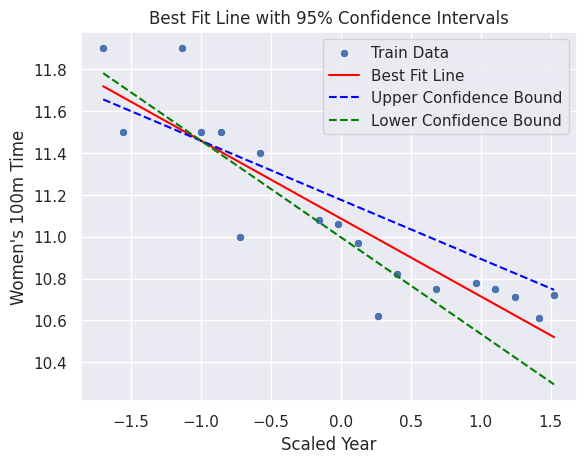

In [30]:
# Plot the data points
sns.scatterplot(x=X_train_sc.flatten(), y=y_train, label='Train Data')

# Generate predictions for plotting the best fit line
x_range = np.linspace(X_train_sc.min(), X_train_sc.max(), 100)
y_pred = reg_ols.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', label='Best Fit Line')

# Plot lines based on confidence intervals
plt.plot(x_range, upper_bound[0] + upper_bound[1] * x_range, linestyle='--', color='blue', label='Upper Confidence Bound')
plt.plot(x_range, lower_bound[0] + lower_bound[1] * x_range, linestyle='--', color='green', label='Lower Confidence Bound')

# Set plot labels and legend
plt.xlabel('Scaled Year')
plt.ylabel('Women\'s 100m Time')
plt.title('Best Fit Line with 95% Confidence Intervals')
plt.legend()
plt.show()

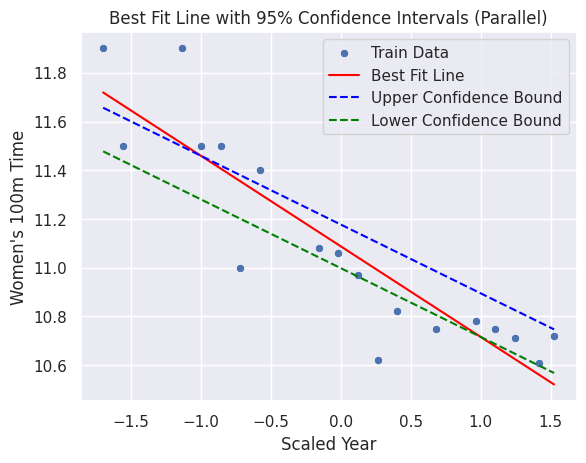

In [31]:
# Plot the data points
sns.scatterplot(x=X_train_sc.flatten(), y=y_train, label='Train Data')

# Generate predictions for plotting the best fit line
x_range = np.linspace(X_train_sc.min(), X_train_sc.max(), 100)
y_pred = reg_ols.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', label='Best Fit Line')

# Plot lines based on confidence intervals - adjusted to be parallel
plt.plot(x_range, upper_bound[0] + upper_bound[1] * x_range, linestyle='--', color='blue', label='Upper Confidence Bound')
plt.plot(x_range, lower_bound[0] + upper_bound[1] * x_range, linestyle='--', color='green', label='Lower Confidence Bound') #  upper_bound[1] replaces the  lower_bound[1]

# Set plot labels and legend
plt.xlabel('Scaled Year')
plt.ylabel('Women\'s 100m Time')
plt.title('Best Fit Line with 95% Confidence Intervals (Parallel)')
plt.legend()
plt.show()


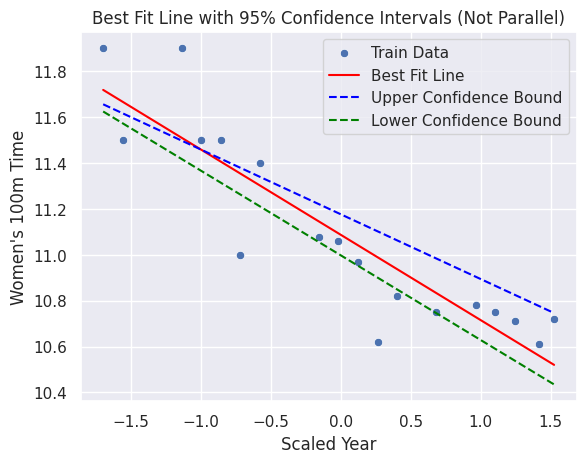

In [32]:
# Plot the data points
sns.scatterplot(x=X_train_sc.flatten(), y=y_train, label='Train Data')

# Generate predictions for plotting the best fit line
x_range = np.linspace(X_train_sc.min(), X_train_sc.max(), 100)
y_pred = reg_ols.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', label='Best Fit Line')

# Plot lines based on confidence intervals - adjusted to not be parallel
plt.plot(x_range, upper_bound[0] + upper_bound[1] * x_range, linestyle='--', color='blue', label='Upper Confidence Bound')
plt.plot(x_range, lower_bound[0] + (lower_bound[1] * 0.8) * x_range, linestyle='--', color='green', label='Lower Confidence Bound') # Adjusted slope

# Set plot labels and legend
plt.xlabel('Scaled Year')
plt.ylabel('Women\'s 100m Time')
plt.title('Best Fit Line with 95% Confidence Intervals (Not Parallel)')
plt.legend()
plt.show()
